In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import spacy

In [2]:
# Wczytanie danych z pliku CSV
df = pd.read_csv("Emotion_final.csv")

# Wypisanie kształtu dataframe
print(df.shape)

# Wypisanie pierwszych 5 wierszy dataframe
df.head(5)

(21459, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
# Informacje o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [4]:
# Liczenie unikalnych wartości w kolumnie 'Emotion'
df['Emotion'].value_counts()

Emotion
happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: count, dtype: int64

In [5]:
# Wczytanie modelu językowego SpaCy
nlp = spacy.load('en_core_web_sm')

In [6]:
# Przykładowy tekst z danych
txt = df['Text'][5]
txt

'ive been feeling a little burdened lately wasnt sure why that was'

In [7]:
# Przetworzenie przykładowego tekstu przez model SpaCy
doc = nlp(txt)

In [8]:
# Wypisanie tokenów w przetworzonym tekście
for token in doc:
    print(token)

i
ve
been
feeling
a
little
burdened
lately
was
nt
sure
why
that
was


In [9]:
# Wypisanie lematyzowanych tokenów
for token in doc:
    print(f"Word: {token} | -> {token.lemma_}")

Word: i | -> I
Word: ve | -> ve
Word: been | -> be
Word: feeling | -> feel
Word: a | -> a
Word: little | -> little
Word: burdened | -> burden
Word: lately | -> lately
Word: was | -> be
Word: nt | -> not
Word: sure | -> sure
Word: why | -> why
Word: that | -> that
Word: was | -> be


In [10]:
# Wypisanie stop słów i znaków interpunkcyjnych
for token in doc:
    if token.is_stop or token.is_punct:
        print(token)

i
been
a
was
why
that
was


In [11]:
# Definicja funkcji przetwarzającej tekst (lematyzacja i usunięcie stop słów)
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [12]:
# Przykładowe przetwarzanie tekstu
print(txt)
procces_txt = preprocess(txt)
print(procces_txt)

ive been feeling a little burdened lately wasnt sure why that was
ve feel little burden lately not sure


In [13]:
# Przetwarzanie całego dataframe
df['preprocessed_text'] = df['Text'].apply(preprocess)
df

,Text,Emotion,preprocessed_text
0,i didnt feel humiliated,sadness,not feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,feel grouchy
...,...,...,...
21454,Melissa stared at her friend in dism,fear,Melissa stare friend dism
21455,Successive state elections have seen the gover...,fear,successive state election see govern party pum...
21456,Vincent was irritated but not dismay,fear,Vincent irritated dismay
21457,Kendall-Hume turned back to face the dismayed ...,fear,kendall Hume turn face dismayed coup


In [14]:
# Kodowanie etykiet emocji
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Emotion_label']=label.fit_transform(df['Emotion'])
df.head(10)

,Text,Emotion,preprocessed_text,Emotion_label
0,i didnt feel humiliated,sadness,not feel humiliated,4
1,i can go from feeling so hopeless to so damned...,sadness,feel hopeless damned hopeful care awake,4
2,im grabbing a minute to post i feel greedy wrong,anger,m grab minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,feel nostalgic fireplace know property,3
4,i am feeling grouchy,anger,feel grouchy,0
5,ive been feeling a little burdened lately wasn...,sadness,ve feel little burden lately not sure,4
6,ive been taking or milligrams or times recomme...,surprise,ve take milligram time recommend ve fall aslee...,5
7,i feel as confused about life as a teenager or...,fear,feel confused life teenager jade year old man,1
8,i have been with petronas for years i feel tha...,happy,petrona year feel petronas perform huge profit,2
9,i feel romantic too,love,feel romantic,3


In [15]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['Emotion_label'],
                                                    test_size=0.25, random_state=42, stratify=df['Emotion_label'])

In [16]:
# Wypisanie kształtu zbiorów treningowego i testowego
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (16094,)
Shape of X_test:  (5365,)


In [17]:
# Tworzenie wektorów TF-IDF z tekstu
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

In [79]:
print("Shape of X_train_cv: ", X_train_cv.shape)
print("Shape of X_test_cv: ", X_test_cv.shape)
X_test_cv

Shape of X_train_cv:  (16094, 13029)
Shape of X_test_cv:  (5365, 13029)


<5365x13029 sparse matrix of type '<class 'numpy.float64'>'
	with 38584 stored elements in Compressed Sparse Row format>

In [18]:
# Trenowanie modelu RF
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train_cv, y_train)

RandomForestClassifier()

In [19]:
# Przewidywanie etykiet na zbiorze testowy
y_pred = RFC_model.predict(X_test_cv)

In [20]:
# Wypisanie dokładności modelu
print(accuracy_score(y_test, y_pred))

0.8598322460391425


In [21]:
# Wypisanie raportu klasyfikacji
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       748
           1       0.84      0.86      0.85       663
           2       0.85      0.92      0.88      1758
           3       0.81      0.66      0.73       410
           4       0.91      0.87      0.89      1566
           5       0.78      0.70      0.73       220

    accuracy                           0.86      5365
   macro avg       0.84      0.81      0.82      5365
weighted avg       0.86      0.86      0.86      5365



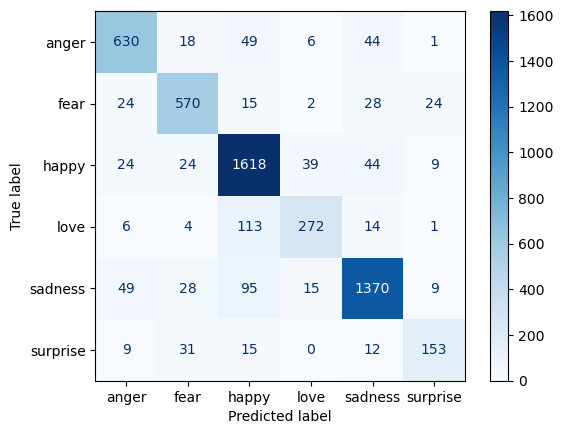

In [22]:
# Tworzenie i wyświetlanie macierzy błędów
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculating the table of errors
cm = confusion_matrix(y_test, y_pred)

# Displaying the table of errors
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [23]:
# Trenowanie modelu SVM
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train_cv, y_train)

SVC(kernel='linear', random_state=0)

In [24]:
# Przewidywanie etykiet na zbiorze testowym za pomocą SVM
y_pred=model_svm.predict(X_test_cv)

In [25]:
# Wypisanie dokładności modelu SVM
print(accuracy_score(y_test, y_pred))

0.8631873252562908


In [26]:
# Wypisanie raportu klasyfikacji SVM
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       748
           1       0.82      0.84      0.83       663
           2       0.87      0.92      0.89      1758
           3       0.79      0.69      0.74       410
           4       0.89      0.90      0.90      1566
           5       0.80      0.69      0.74       220

    accuracy                           0.86      5365
   macro avg       0.84      0.81      0.82      5365
weighted avg       0.86      0.86      0.86      5365



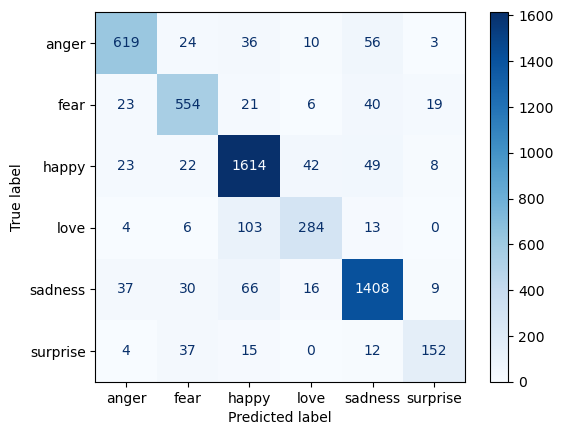

In [27]:
# Tworzenie i wyświetlanie macierzy błędów dla SVM
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()